In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
#from plotly.graph_objects as go

SyntaxError: invalid syntax (<ipython-input-77-d809dd1433e0>, line 6)

In [76]:
'''
UPA: Unidade Primária de Amostragem (UF(2) + número squencial(6) + DV(1))
V1008: Número do Domicílio
Estrato
V1014: Painel - Grupo de Amostra
V1016: Número de entrevista (1 a 5)
V2003: Número de ordem

Chave para pessoa: UPA + V1008 + V1014  + V2003
'''

'\nUPA: Unidade Primária de Amostragem (UF(2) + número squencial(6) + DV(1))\nV1008: Número do Domicílio\nEstrato\nV1014: Painel - Grupo de Amostra\nV1016: Número de entrevista (1 a 5)\nV2003: Número de ordem\n'

In [27]:
#Leitura de todas as bases com as variáveis selecionadas e criação de variáveis dinamicamente

colunas_selecionadas = ['Ano', 'Trimestre', 'UPA', 'UF', 'V1008','V1014','V2003', 'V4022', 'V1016']

for ano in range(2019, 2023):
    for tri in range(1, 5):
        if ano == 2019  and tri > 3:
            print(ano, tri)
            globals()[f'pnad_{ano}_{tri}'] = pd.read_csv(f'/home/matheus/Microdados PNAD/{ano}_{tri}.csv', usecols=colunas_selecionadas)
        if 2019 < ano < 2022:
            print(ano, tri)
            globals()[f'pnad_{ano}_{tri}'] = pd.read_csv(f'/home/matheus/Microdados PNAD/{ano}_{tri}.csv', usecols=colunas_selecionadas)
        if ano == 2022 and tri < 3:
            print(ano, tri)
            globals()[f'pnad_{ano}_{tri}'] = pd.read_csv(f'/home/matheus/Microdados PNAD/{ano}_{tri}.csv', usecols=colunas_selecionadas)


2019 4
2020 1
2020 2
2020 3
2020 4
2021 1
2021 2
2021 3
2021 4
2022 1
2022 2


In [28]:
#dataframe com a ID da pessoa e a variável de interesse

for ano in range(2019, 2023):
    for tri in range(1, 5):
        if ano == 2019  and tri > 3:
            print(ano, tri)
            globals()[f'pnad_{ano}_{tri}_id_local'] = pd.DataFrame(
                                                        {'Ano':globals()[f'pnad_{ano}_{tri}']['Ano'], 
                                                        'Trimestre':globals()[f'pnad_{ano}_{tri}']['Trimestre'],  
                                                        'ID': globals()[f'pnad_{ano}_{tri}']['UPA'] + 
                                                              globals()[f'pnad_{ano}_{tri}']['V1008'] + 
                                                              globals()[f'pnad_{ano}_{tri}']['V1014'] + 
                                                              globals()[f'pnad_{ano}_{tri}']['V2003'],
                                                        'V4022': globals()[f'pnad_{ano}_{tri}']['V4022'],
                                                        'V1016': globals()[f'pnad_{ano}_{tri}']['V1016']})
        if 2019 < ano < 2022:
            print(ano, tri)
            globals()[f'pnad_{ano}_{tri}_id_local'] = pd.DataFrame(
                                                        {'Ano':globals()[f'pnad_{ano}_{tri}']['Ano'], 
                                                        'Trimestre':globals()[f'pnad_{ano}_{tri}']['Trimestre'],  
                                                        'ID': globals()[f'pnad_{ano}_{tri}']['UPA'] + 
                                                              globals()[f'pnad_{ano}_{tri}']['V1008'] + 
                                                              globals()[f'pnad_{ano}_{tri}']['V1014'] + 
                                                              globals()[f'pnad_{ano}_{tri}']['V2003'],
                                                        'V4022': globals()[f'pnad_{ano}_{tri}']['V4022'],
                                                        'V1016': globals()[f'pnad_{ano}_{tri}']['V1016']})
        if ano == 2022 and tri < 3:
            print(ano, tri)
            globals()[f'pnad_{ano}_{tri}_id_local'] = pd.DataFrame(
                                                        {'Ano':globals()[f'pnad_{ano}_{tri}']['Ano'], 
                                                        'Trimestre':globals()[f'pnad_{ano}_{tri}']['Trimestre'],  
                                                        'ID': globals()[f'pnad_{ano}_{tri}']['UPA'] + 
                                                              globals()[f'pnad_{ano}_{tri}']['V1008'] + 
                                                              globals()[f'pnad_{ano}_{tri}']['V1014'] + 
                                                              globals()[f'pnad_{ano}_{tri}']['V2003'],
                                                        'V4022': globals()[f'pnad_{ano}_{tri}']['V4022'],
                                                        'V1016': globals()[f'pnad_{ano}_{tri}']['V1016']})

2019 4
2020 1
2020 2
2020 3
2020 4
2021 1
2021 2
2021 3
2021 4
2022 1
2022 2


In [29]:
pnadc_completa = pd.concat([pnad_2019_4_id_local, 
                            pnad_2020_1_id_local, 
                            pnad_2020_2_id_local, 
                            pnad_2020_3_id_local, 
                            pnad_2020_4_id_local, 
                            pnad_2021_1_id_local, 
                            pnad_2021_2_id_local, 
                            pnad_2021_3_id_local, 
                            pnad_2021_4_id_local, 
                            pnad_2022_1_id_local, 
                            pnad_2022_2_id_local])

In [30]:
pnadc_completa.sort_values(by=['Ano', 'Trimestre'], inplace=True)

In [68]:
#concatenar coluna ano e trimestre em uma única coluna
pnadc_completa['Ano_Tri'] = pnadc_completa['Ano'].astype(str) + 'Q' + pnadc_completa['Trimestre'].astype(str)

#Conversão para formato de data
#

In [70]:
pnadc_completa['Ano_Tri'] = pd.PeriodIndex(pnadc_completa['Ano_Tri'], freq='Q')

In [71]:
display(pnadc_completa)

,Ano,Trimestre,ID,V4022,V1016,Ano_Tri
0,2019,4,110000025,NaN,4,2019Q4
1,2019,4,110000026,NaN,4,2019Q4
2,2019,4,110000027,NaN,4,2019Q4
3,2019,4,110000028,NaN,4,2019Q4
4,2019,4,110000027,NaN,4,2019Q4
...,...,...,...,...,...,...
482113,2022,2,530057568,NaN,3,2022Q2
482114,2022,2,530057568,NaN,3,2022Q2
482115,2022,2,530057569,NaN,3,2022Q2
482116,2022,2,530057570,NaN,3,2022Q2


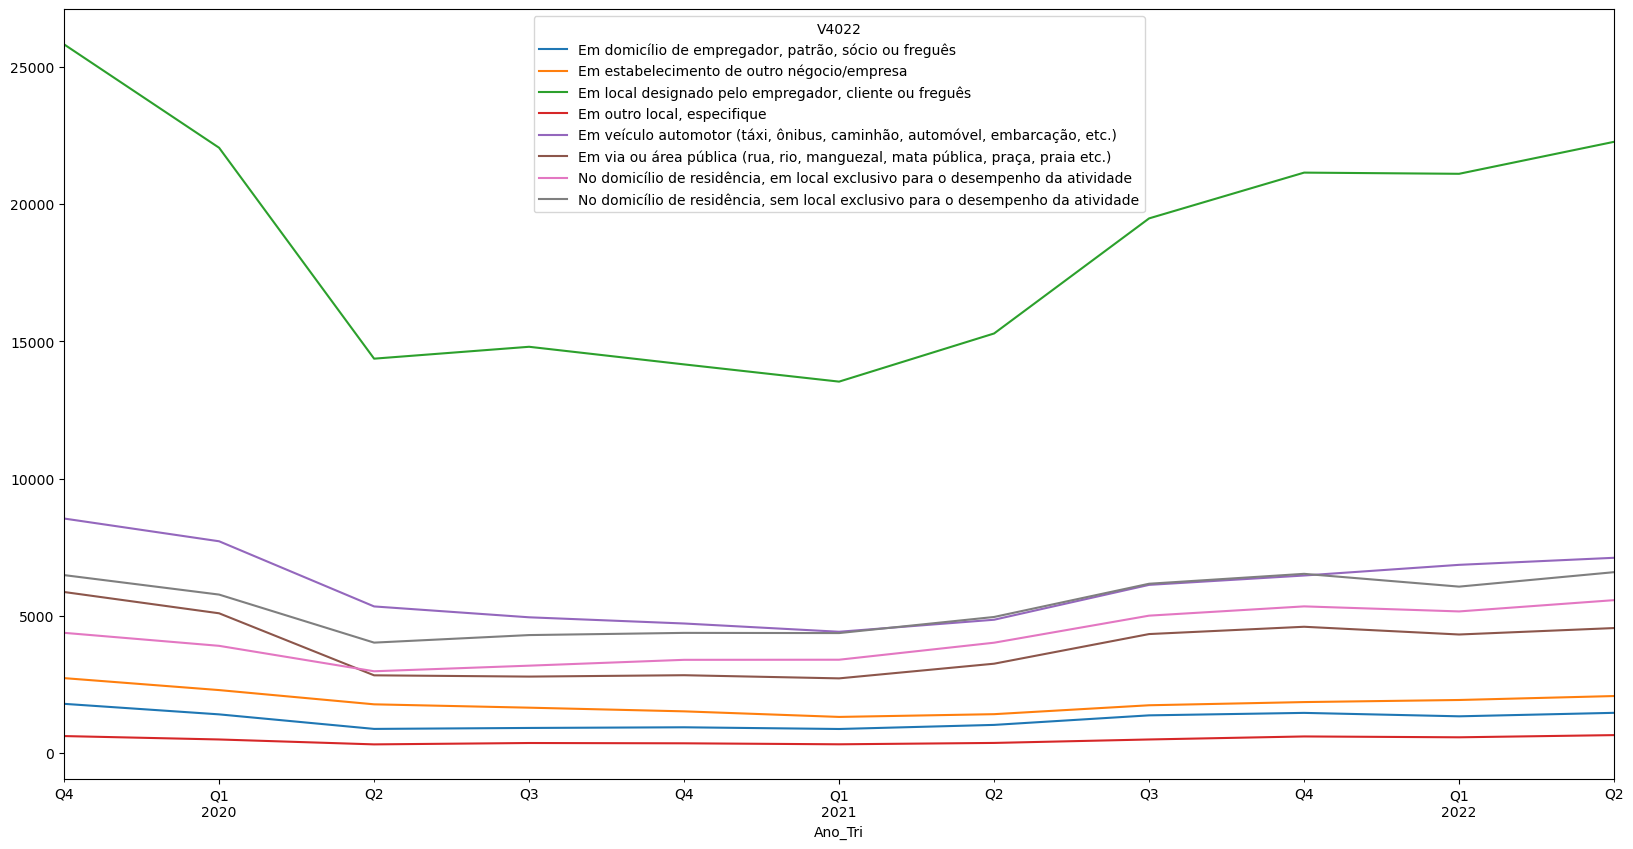

In [76]:
fig, ax = plt.subplots(figsize=(20, 10))
pnadc_completa.groupby('Ano_Tri')['V4022'].value_counts().unstack().plot(ax=ax)
plt.show()

In [32]:
#isso pode ser um erro??????
pnadc_completa[pnadc_completa['ID'] == 530057568]

,Ano,Trimestre,ID,V4022,V1016
368209,2020,3,530057568,NaN,1
335565,2020,4,530057568,NaN,2
319890,2021,1,530057568,NaN,3
319895,2021,1,530057568,NaN,3
319897,2021,1,530057568,NaN,3
356236,2021,2,530057568,NaN,4
434809,2021,3,530057568,NaN,5
434814,2021,3,530057568,NaN,5
434817,2021,3,530057568,NaN,5
461794,2021,4,530057568,NaN,1
